In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
!ls /glade/scratch/fvitt/archive/f.e21.FWscHIST.ne30_L48_BL10_cam6_3_041_control.hf.001_ubc01/atm/hist/*cam.h0.198*.nc | wc
!ls /glade/scratch/hannay/archive/f.e21.FWscHIST.ne30_L48_BL10_cam6_3_041_control.hf.001/atm/hist/*cam.h0.198*.nc | wc

# control_histories = '/glade/scratch/fvitt/archive/f2000_ubc_f09_32lev_cntrl01/atm/hist/f2000*h0.000[2-6]-*.nc'
# test_histories = '/glade/scratch/fvitt/archive/f2000_ubc_f09_32lev_test01/atm/hist/f2000*h0.000[2-6]-*.nc'

control_histories = '/glade/scratch/hannay/archive/f.e21.FWscHIST.ne30_L48_BL10_cam6_3_041_control.hf.001/atm/hist/*cam.h0.198*.nc'
test_histories = '/glade/scratch/fvitt/archive/f.e21.FWscHIST.ne30_L48_BL10_cam6_3_041_control.hf.001_ubc01/atm/hist/*cam.h0.198*.nc'

    120     120   21360
    120     120   20040


In [3]:
ds0 = xr.open_mfdataset(control_histories)

h2ocntrl = ds0['H2O'].sel(time = slice('1985-01-01','1989-01-12')).mean(dim=('time','lon'))

In [4]:
ds1 = xr.open_mfdataset(test_histories)

h2otest = ds1['H2O'].sel(time = slice('1985-01-01','1989-01-12')).mean(dim=('time','lon'))

In [5]:
# WACCM zonal mean historical file
ubc_file='/glade/p/cesmdata/cseg/inputdata/atm/cam/chem/ubc/f.e21.FWHISTBgcCrop.f09_f09_mg17.CMIP6-AMIP-WACCM.ensAvg123.cam.h0zm.UBC.195001-201412_c220322.nc'
dsw = xr.open_dataset(ubc_file)

In [6]:
# waccm_h2o = dsw.sel(time = slice('1995-01-01','2005-01-12')).H2O.mean(dim='time')
waccm_h2o = dsw.sel(time = slice('1985-01-01','1989-01-12')).H2O.mean(dim='time')

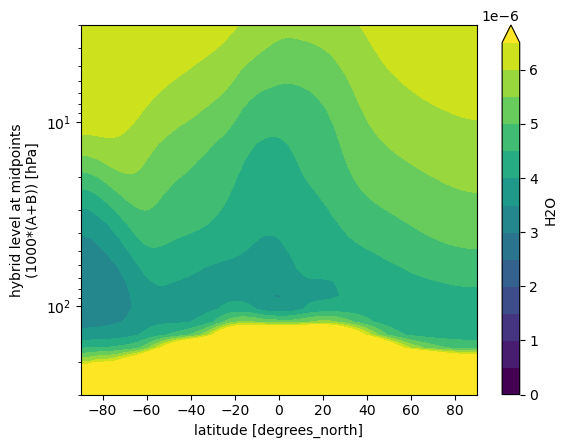

In [7]:
waccm_h2o.plot.contourf(yscale = 'log', vmin=0, vmax=6.5e-6, ylim=(300,3), levels=14)
plt.show()

In [ ]:
!ls /glade/p/cesmdata/cseg/inputdata/atm/cam/chem/ubc/f.e21.*

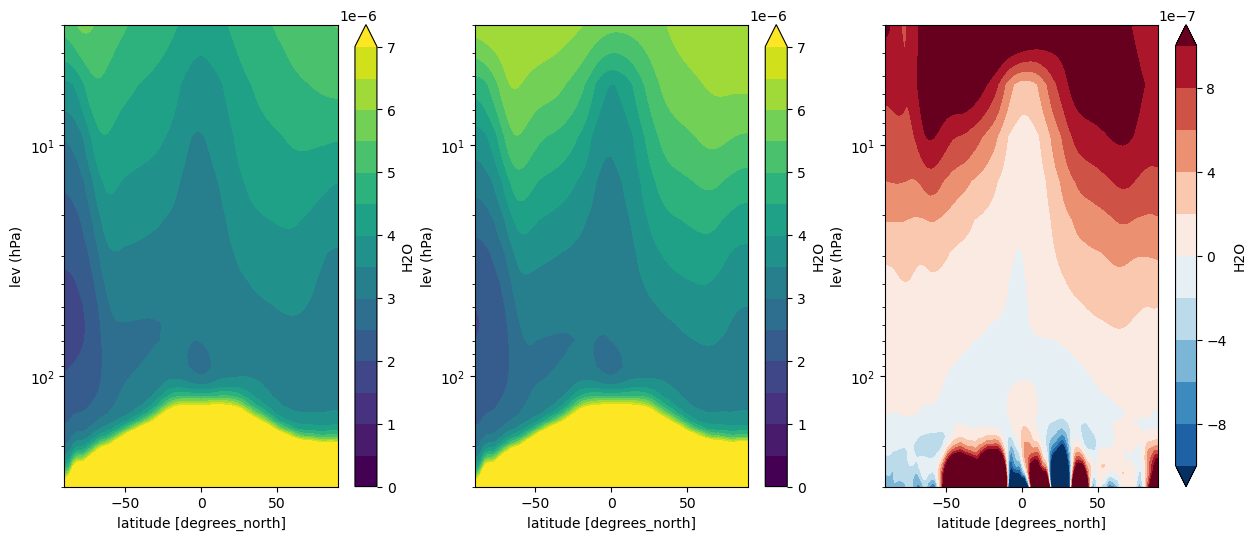

In [8]:
plt.subplots(nrows=1, ncols=3, figsize=(15,6))

plt.subplot(1, 3, 1)
h2ocntrl.plot.contourf(yscale = 'log', vmin=0, vmax=7e-6, ylim=(300,3), levels=15)
ax = plt.gca()
ax.set_ylabel('lev (hPa)')

plt.subplot(1, 3, 2)
h2otest.plot.contourf(yscale = 'log', vmin=0, vmax=7e-6, ylim=(300,3),levels=15)
ax = plt.gca()
ax.set_ylabel('lev (hPa)')

plt.subplot(1, 3, 3)
diff = h2otest - h2ocntrl
diff.plot.contourf(yscale = 'log', vmax=1e-6, ylim=(300,3), levels=11)
ax = plt.gca()
ax.set_ylabel('lev (hPa)')

plt.show()

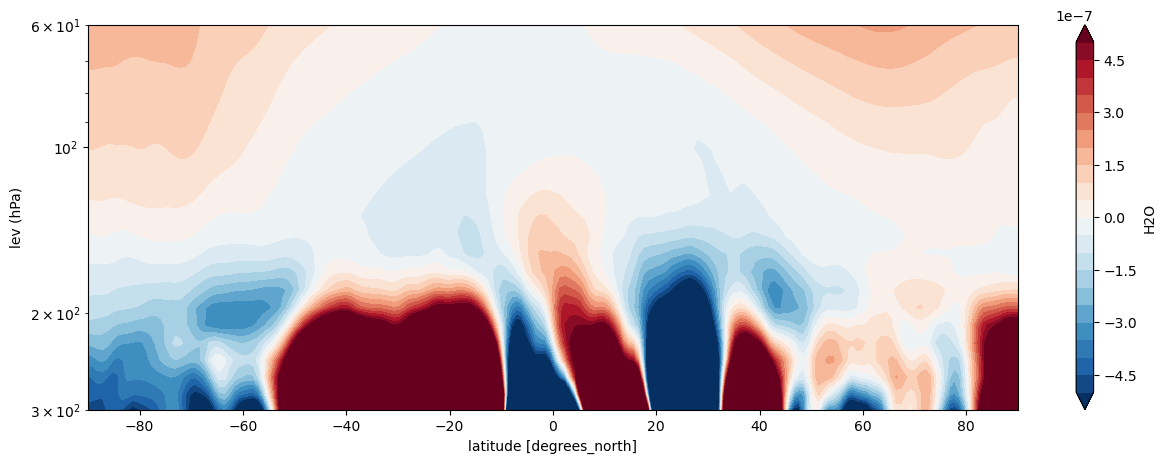

In [9]:
diff.plot.contourf(yscale = 'log', vmax=5e-7, ylim=(300,60), levels=21, figsize=(15,5))
ax = plt.gca()
ax.set_ylabel('lev (hPa)')

plt.show()

In [10]:
flds_ctrl = ds0['FLDS'].mean(dim=('time','lon'))
flds_test = ds1['FLDS'].mean(dim=('time','lon'))
flnsc_ctrl = ds0['FLNSC'].mean(dim=('time','lon'))
flnsc_test = ds1['FLNSC'].mean(dim=('time','lon'))

In [ ]:
(flnsc_test-flnsc_ctrl).plot()
plt.show()

In [ ]:
flnt_ctrl = ds0['FLNT'].mean(dim=('time','lon'))
flnt_test = ds1['FLNT'].mean(dim=('time','lon'))

In [ ]:
(flnt_test-flnt_ctrl).plot(figsize=(15,5), ylim=(-2,2))
plt.show()

In [ ]:
#RESTOM = FSNT - FLNT
restom_ctrl = (ds0['FSNT']-ds0['FLNT']).mean(dim=('time','lon'))
restom_test = (ds1['FSNT']-ds1['FLNT']).mean(dim=('time','lon'))

In [ ]:
weights = np.cos(np.deg2rad(ds0.lat))
weights.name = "weights"
rgmctrl = restom_ctrl.weighted(weights).mean('lat').values
rgmtest = restom_test.weighted(weights).mean('lat').values
print(rgmctrl, rgmtest, rgmtest-rgmctrl)

In [ ]:
(restom_test-restom_ctrl).plot(figsize=(15,5))
plt.show()

test level: 9.08718780517578
8.59972508624196


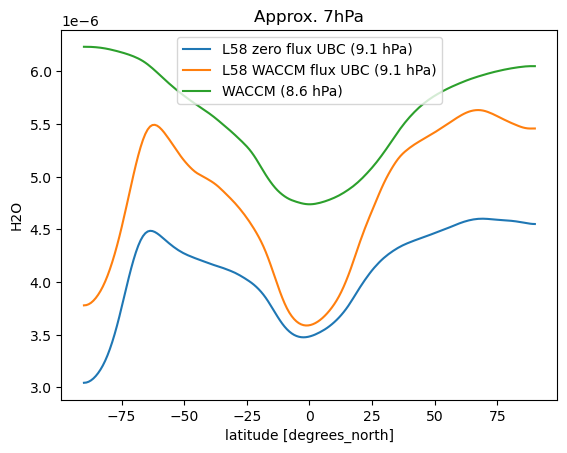

In [11]:
h2ocntrl.sel(lev=8., method='Nearest').plot(label='L58 zero flux UBC (9.1 hPa)')
h2otest.sel(lev=8., method='Nearest').plot(label='L58 WACCM flux UBC (9.1 hPa)')
waccm_h2o.sel(lev=8., method='Nearest').plot(label='WACCM (8.6 hPa)')
ax = plt.gca()
ax.set_title('Approx. 7hPa')

print('test level:', h2otest.sel(lev=8., method='Nearest').lev.values)
print(waccm_h2o.sel(lev=8., method='Nearest').lev.values)

plt.legend()
plt.show()

test level: 38.552352294921874
35.92325001955032


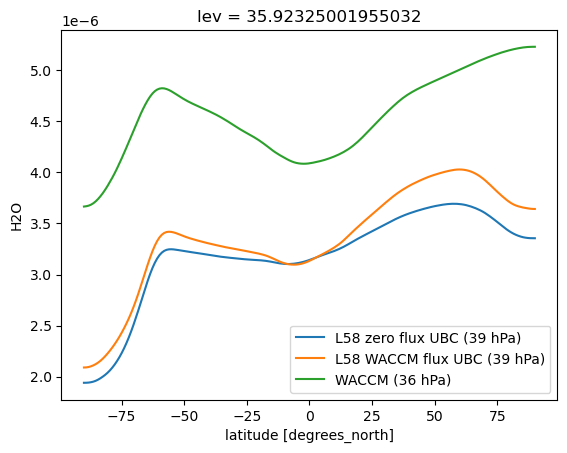

In [15]:
h2ocntrl.sel(lev=35., method='Nearest').plot(label='L58 zero flux UBC (39 hPa)')
h2otest.sel(lev=35., method='Nearest').plot(label='L58 WACCM flux UBC (39 hPa)')
waccm_h2o.sel(lev=35., method='Nearest').plot(label='WACCM (36 hPa)')
ax = plt.gca()
#ax.set_title('Approx. 103 hPa')

print('test level:', h2otest.sel(lev=35., method='Nearest').lev.values)
print(waccm_h2o.sel(lev=35., method='Nearest').lev.values)

plt.legend()
plt.show()

In [17]:
lev = 73
print(h2ocntrl.lev.sel(lev=lev, method='Nearest').values)
print(waccm_h2o.lev.sel(lev=lev, method='Nearest').values)


69.66665161132812
73.75095784664154


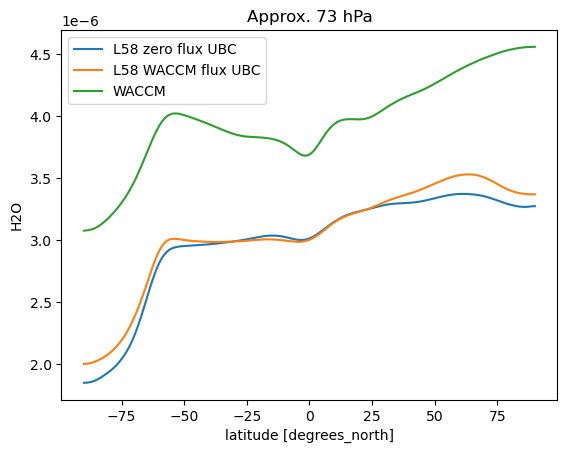

In [18]:
h2ocntrl.sel(lev=73., method='Nearest').plot(label='L58 zero flux UBC')
h2otest.sel(lev=73., method='Nearest').plot(label='L58 WACCM flux UBC')
waccm_h2o.sel(lev=73., method='Nearest').plot(label='WACCM')
ax = plt.gca()
ax.set_title('Approx. 73 hPa')

plt.legend()
plt.show()